# Facial Keypoints Detection using MLP with Kaggle Dataset in Julia
Version: 2.01

## Objective

<img src="images/ProblemStatement.jpg">

## Multi Layer Perceptron

<img src="images/MLP.jpg">

## 10. Code Base

### 10.01 Update file location for the training and test data

In [1]:
# specify the file locations
trainingfile = "data/training.csv"
testfile = "data/test.csv";

### 10.02. Read training data from training file into a training data frame (<font color=blue>df_trn</font>)

In [2]:
########################################################  START  ##############################################################

In [3]:
# for using "CSV.read" to read ".csv" files
using CSV 
# for using dataframes
using DataFrames

In [4]:
# load training data
df_trn = DataFrame(CSV.read(trainingfile));

In [5]:
# check size of the training dataframe
size(df_trn)

(7049, 31)

In [6]:
########################################################  END  ################################################################

### 10.03. Get training data frame without any missing items (<font color=blue>df_trn_nm</font>)

In [7]:
########################################################  START  ##############################################################

In [8]:
# custom function to calculate available data for the specified keypoint as the parameter
function notmissing(df::DataFrame, col::Symbol)
    nomiss = .!ismissing.(df[col])
    return(sum(nomiss))
end

notmissing (generic function with 1 method)

In [9]:
# check how many values of each keypoints we have 
println("Total available keypoints in training data are:
    left_eye_center_x = $(notmissing(df_trn, :left_eye_center_x))
    left_eye_center_y = $(notmissing(df_trn, :left_eye_center_y))
    right_eye_center_x = $(notmissing(df_trn, :right_eye_center_x))
    right_eye_center_y = $(notmissing(df_trn, :right_eye_center_y))
    left_eye_inner_corner_x = $(notmissing(df_trn, :left_eye_inner_corner_x))
    left_eye_inner_corner_y = $(notmissing(df_trn, :left_eye_inner_corner_y))
    left_eye_outer_corner_x = $(notmissing(df_trn, :left_eye_outer_corner_x))
    left_eye_outer_corner_y = $(notmissing(df_trn, :left_eye_outer_corner_y))
    right_eye_inner_corner_x = $(notmissing(df_trn, :right_eye_inner_corner_x))
    right_eye_inner_corner_y = $(notmissing(df_trn, :right_eye_inner_corner_y))
    right_eye_outer_corner_x = $(notmissing(df_trn, :right_eye_outer_corner_x))
    right_eye_outer_corner_y = $(notmissing(df_trn, :right_eye_outer_corner_y))
    left_eyebrow_inner_end_x = $(notmissing(df_trn, :left_eyebrow_inner_end_x))
    left_eyebrow_inner_end_y = $(notmissing(df_trn, :left_eyebrow_inner_end_y))
    left_eyebrow_outer_end_x = $(notmissing(df_trn, :left_eyebrow_outer_end_x))    
    left_eyebrow_outer_end_y = $(notmissing(df_trn, :left_eyebrow_outer_end_y))    
    right_eyebrow_inner_end_x = $(notmissing(df_trn, :right_eyebrow_inner_end_x))    
    right_eyebrow_inner_end_y = $(notmissing(df_trn, :right_eyebrow_inner_end_y))    
    right_eyebrow_outer_end_x = $(notmissing(df_trn, :right_eyebrow_outer_end_x))    
    right_eyebrow_outer_end_y = $(notmissing(df_trn, :right_eyebrow_outer_end_y))    
    nose_tip_x = $(notmissing(df_trn, :nose_tip_x))    
    nose_tip_y = $(notmissing(df_trn, :nose_tip_y))    
    mouth_left_corner_x = $(notmissing(df_trn, :mouth_left_corner_x))    
    mouth_left_corner_y = $(notmissing(df_trn, :mouth_left_corner_y))    
    mouth_right_corner_x = $(notmissing(df_trn, :mouth_right_corner_x))    
    mouth_right_corner_y = $(notmissing(df_trn, :mouth_right_corner_y))    
    mouth_center_top_lip_x = $(notmissing(df_trn, :mouth_center_top_lip_x))    
    mouth_center_top_lip_y = $(notmissing(df_trn, :mouth_center_top_lip_y))    
    mouth_center_bottom_lip_x = $(notmissing(df_trn, :mouth_center_bottom_lip_x))    
    mouth_center_bottom_lip_y = $(notmissing(df_trn, :mouth_center_bottom_lip_y))  
    ")

Total available keypoints in training data are:
    left_eye_center_x = 7039
    left_eye_center_y = 7039
    right_eye_center_x = 7036
    right_eye_center_y = 7036
    left_eye_inner_corner_x = 2271
    left_eye_inner_corner_y = 2271
    left_eye_outer_corner_x = 2267
    left_eye_outer_corner_y = 2267
    right_eye_inner_corner_x = 2268
    right_eye_inner_corner_y = 2268
    right_eye_outer_corner_x = 2268
    right_eye_outer_corner_y = 2268
    left_eyebrow_inner_end_x = 2270
    left_eyebrow_inner_end_y = 2270
    left_eyebrow_outer_end_x = 2225    
    left_eyebrow_outer_end_y = 2225    
    right_eyebrow_inner_end_x = 2270    
    right_eyebrow_inner_end_y = 2270    
    right_eyebrow_outer_end_x = 2236    
    right_eyebrow_outer_end_y = 2236    
    nose_tip_x = 7049    
    nose_tip_y = 7049    
    mouth_left_corner_x = 2269    
    mouth_left_corner_y = 2269    
    mouth_right_corner_x = 2270    
    mouth_right_corner_y = 2270    
    mouth_center_top_lip_x = 2275    
  

In [10]:
# check type of one column... note the "Union{Missing,Float64}"
typeof(df_trn.left_eye_center_x)

Array{Union{Missing, Float64},1}

In [11]:
# drop rows with missing data
df_trn_nm = dropmissing(df_trn, disallowmissing=true);

In [12]:
size(df_trn_nm)

(2140, 31)

In [13]:
# NOTE: disallowmissing = true : drops rows w/ missing data, changes type to only "Float64".
# NOTE: disallowmissing = false : drops rows w/ missing data, retains type as "Union{Missing,Float64}".
typeof(df_trn_nm.left_eye_center_x)

Array{Float64,1}

In [14]:
########################################################  END  ################################################################

### 10.04. Get the training input data matching to MLP input layer expectation (<font color=blue>x_trn</font>)

In [15]:
########################################################  START  ##############################################################

In [16]:
# for using "readdlm" to read delimited files
using DelimitedFiles

In [17]:
# read the string in column "Image" of every row, and extract gray scale integer pixel values from the string
# gives array of array: column vector array of 2140 elements - eah element is a 1x9216 pixel value array for 96x96 image
# divide by 255 to scale the pixel values to [0,1]
xdata_trn = [[readdlm(IOBuffer(row.Image),Int64)] for row in eachrow(df_trn_nm)] / 255

2140-element Array{Array{Array{Float64,2},1},1}:
 [[0.933333 0.92549 … 0.294118 0.352941]]      
 [[0.858824 0.843137 … 0.00392157 0.00392157]] 
 [[0.564706 0.556863 … 0.305882 0.301961]]     
 [[0.756863 0.752941 … 0.00392157 0.00392157]] 
 [[0.576471 0.580392 … 0.666667 0.690196]]     
 [[0.654902 0.662745 … 0.337255 0.372549]]     
 [[0.427451 0.427451 … 0.423529 0.403922]]     
 [[0.698039 0.694118 … 0.282353 0.290196]]     
 [[0.643137 0.619608 … 0.4 0.541176]]          
 [[0.886275 0.890196 … 0.447059 0.443137]]     
 [[0.203922 0.2 … 0.745098 0.733333]]          
 [[0.556863 0.486275 … 0.752941 0.745098]]     
 [[0.337255 0.364706 … 0.533333 0.529412]]     
 ⋮                                             
 [[0.164706 0.0980392 … 0.0156863 0.0313725]]  
 [[0.25098 0.290196 … 0.329412 0.341176]]      
 [[0.0313725 0.0313725 … 0.0431373 0.0509804]] 
 [[0.00392157 0.0117647 … 0.0196078 0.0784314]]
 [[0.0 0.0 … 0.0784314 0.133333]]              
 [[0.133333 0.203922 … 0.0470588 0.0431

In [18]:
# now each element is a row vector... we need to convert this to a column vector to match to the MLP input layer
xdata_trn[1,1][1]

1×9216 Array{Float64,2}:
 0.933333  0.92549  0.929412  0.933333  …  0.27451  0.294118  0.352941

In [19]:
# define as global variable and get the 1st element loaded into it by working on 1st row of image data
# transpose (') converts the 1x9216 row vector to 9216x1 column vector
global x_trn = [(xdata_trn[1,1][1])']

1-element Array{LinearAlgebra.Adjoint{Float64,Array{Float64,2}},1}:
 [0.933333; 0.92549; … ; 0.294118; 0.352941]

In [20]:
# repeat above for rest of the rows of the data
for i in 2:size(df_trn_nm,1)
    x_trn = vcat(x_trn, [(xdata_trn[i,1][1])'])
end

In [21]:
# check the type / values of x_trn
x_trn

2140-element Array{LinearAlgebra.Adjoint{Float64,Array{Float64,2}},1}:
 [0.933333; 0.92549; … ; 0.294118; 0.352941]      
 [0.858824; 0.843137; … ; 0.00392157; 0.00392157] 
 [0.564706; 0.556863; … ; 0.305882; 0.301961]     
 [0.756863; 0.752941; … ; 0.00392157; 0.00392157] 
 [0.576471; 0.580392; … ; 0.666667; 0.690196]     
 [0.654902; 0.662745; … ; 0.337255; 0.372549]     
 [0.427451; 0.427451; … ; 0.423529; 0.403922]     
 [0.698039; 0.694118; … ; 0.282353; 0.290196]     
 [0.643137; 0.619608; … ; 0.4; 0.541176]          
 [0.886275; 0.890196; … ; 0.447059; 0.443137]     
 [0.203922; 0.2; … ; 0.745098; 0.733333]          
 [0.556863; 0.486275; … ; 0.752941; 0.745098]     
 [0.337255; 0.364706; … ; 0.533333; 0.529412]     
 ⋮                                                
 [0.164706; 0.0980392; … ; 0.0156863; 0.0313725]  
 [0.25098; 0.290196; … ; 0.329412; 0.341176]      
 [0.0313725; 0.0313725; … ; 0.0431373; 0.0509804] 
 [0.00392157; 0.0117647; … ; 0.0196078; 0.0784314]
 [0.0; 0.0;

In [22]:
# number of training instances = 2140
size(x_trn)

(2140,)

In [23]:
# each element is a 9216x1 column vector - matches the input layer expectation for MLP
size(x_trn[1])

(9216, 1)

In [24]:
########################################################  END  ################################################################

### 10.05. Get the training output data matching to MLP output layer expectation (<font color=blue>y_trn</font>)

In [25]:
########################################################  START  ##############################################################

In [26]:
# get to know the names of the columns in the training data frame
names(df_trn)

31-element Array{Symbol,1}:
 :left_eye_center_x        
 :left_eye_center_y        
 :right_eye_center_x       
 :right_eye_center_y       
 :left_eye_inner_corner_x  
 :left_eye_inner_corner_y  
 :left_eye_outer_corner_x  
 :left_eye_outer_corner_y  
 :right_eye_inner_corner_x 
 :right_eye_inner_corner_y 
 :right_eye_outer_corner_x 
 :right_eye_outer_corner_y 
 :left_eyebrow_inner_end_x 
 ⋮                         
 :right_eyebrow_outer_end_y
 :nose_tip_x               
 :nose_tip_y               
 :mouth_left_corner_x      
 :mouth_left_corner_y      
 :mouth_right_corner_x     
 :mouth_right_corner_y     
 :mouth_center_top_lip_x   
 :mouth_center_top_lip_y   
 :mouth_center_bottom_lip_x
 :mouth_center_bottom_lip_y
 :Image                    

In [27]:
# output is an array of array with 2140 rows for 2140 samples
# each row contains 1 element - which is an array - which is a column vector of 30x1 size => 30 keypoints
y_trn = [[
        row.left_eye_center_x, row.left_eye_center_y, 
        row.right_eye_center_x, row.right_eye_center_y, 
        row.left_eye_inner_corner_x, row.left_eye_inner_corner_y,
        row.left_eye_outer_corner_x, row.left_eye_outer_corner_y,
        row.right_eye_inner_corner_x, row.right_eye_inner_corner_y,
        row.right_eye_outer_corner_x, row.right_eye_outer_corner_y,
        row.left_eyebrow_inner_end_x, row.left_eyebrow_inner_end_y,
        row.left_eyebrow_outer_end_x, row.left_eyebrow_outer_end_y,
        row.right_eyebrow_inner_end_x, row.right_eyebrow_inner_end_y,
        row.right_eyebrow_outer_end_x, row.right_eyebrow_outer_end_y,
        row.nose_tip_x, row.nose_tip_y,
        row.mouth_left_corner_x, row.mouth_left_corner_y,
        row.mouth_right_corner_x, row.mouth_right_corner_y,
        row.mouth_center_top_lip_x, row.mouth_center_top_lip_y,
        row.mouth_center_bottom_lip_x, row.mouth_center_bottom_lip_y
    ] for row in eachrow(df_trn_nm)];

In [28]:
# number of training instances = 2140
size(y_trn)

(2140,)

In [29]:
# each element is a 30x1 column vector - matches the output layer expectation for MLP
size(y_trn[1]) 

(30,)

In [30]:
########################################################  END  ################################################################

### 10.06. Define training data (<font color=blue>mytrainingdata</font>) and validation data (<font color=blue>x_trn_validationdata,y_trn_validationdata</font>) 

We will use first 80% of x_trn for training and rest 20% for validation.

In [31]:
########################################################  START  ##############################################################

In [32]:
traindata_size = Int64(0.8*size(x_trn,1))

1712

In [33]:
# custom function to help copy data from x_trn and create training an validation data
function copyb2a(a,b,startindex,endindex)
    a = []  
    for i in startindex:endindex
        push!(a,b[i])
    end
    return a
end    

copyb2a (generic function with 1 method)

In [34]:
# create training data : x_trn[1:trainingdata_size]
x_trn_traindata = []
x_trn_traindata = copyb2a(x_trn_traindata,x_trn,1,traindata_size);
y_trn_traindata = []
y_trn_traindata = copyb2a(y_trn_traindata,y_trn,1,traindata_size);

In [35]:
# zip to have the data ready for training model
mytrainingdata = zip(x_trn_traindata,y_trn_traindata);

In [36]:
# create training data : x_trn[trainingdata_size+1:end]
x_trn_validationdata = []
x_trn_validationdata = copyb2a(x_trn_validationdata,x_trn,(traindata_size+1),size(x_trn,1));
y_trn_validationdata = []
y_trn_validationdata = copyb2a(y_trn_validationdata,y_trn,(traindata_size+1),size(x_trn,1));

In [37]:
########################################################  END  ################################################################

### 10.07. Define internal parameters for the Multi Layer Perceptron(<font color=blue>model</font>)

In [38]:
########################################################  START  ##############################################################

In [39]:
# To use libraries for the neural network
using Flux

In [40]:
# input is a 9216x1 column vector (corresponding to a 96x96 image)
inputs = 9216
# output is a 30x1 column vector (corresponding to 15 keypoints x 2 coordinates(x,y))
outputs = 30
# considering hidden layer size as 100 as of now
hidden = 100;
# create layer1 of NN
# activation function used here is relu: 0 for x<0, x or x>=0
layer1 = Dense(inputs,hidden,relu)
# create layer2 of NN
# output activation is a linear combination of the activations in the hidden layer
# hence, using "identity" as the activation function => f(x) = x
layer2 = Dense(hidden,outputs,identity)
# combine the 2 layers into a model
const model = Chain(layer1,layer2)

Chain(Dense(9216, 100, NNlib.relu), Dense(100, 30))

In [41]:
########################################################  END  ################################################################

### 10.08. Define Optimizer (<font color=blue>opt</font>)

In [42]:
########################################################  START  ##############################################################

In [43]:
# using Nesterov's Accelerated Gradient Descent as the optmizer
# learning rate: eta: η
η = 0.01
# momentum: rho: ρ
ρ = 0.9
opt = Nesterov(η,ρ)

Nesterov(0.01, 0.9, IdDict{Any,Any}())

In [44]:
########################################################  END  ################################################################

### 10.09. Define Loss Function (<font color=blue>loss</font>)

In [45]:
########################################################  START  ##############################################################

In [46]:
# using mean squares error as the loss function
loss(x,y) = Flux.mse(model(x),y)

loss (generic function with 1 method)

In [47]:
########################################################  END  ################################################################

### 10.10. Train the Model

In [48]:
########################################################  START  ##############################################################

In [49]:
# callback function for Flux.train!
using Statistics
function evalcb()
    loss_value = mean(loss.(x_trn,y_trn))
    @show(loss_value)
end

evalcb (generic function with 1 method)

In [50]:
# train the model
using Flux: @epochs
# call back function are called for every batch of training data
# Flux.throttle prevents the call back function being called more than once for every timeout seconds
using Flux: throttle
@time (
        @epochs 1 Flux.train!(loss, params(model), mytrainingdata, opt, cb=Flux.throttle(evalcb, 5)) |>gpu
      )

loss_value = 10256.883530680636 (tracked)

┌ Info: Epoch 1
└ @ Main C:\Users\Chinmoy\.julia\packages\Flux\qXNjB\src\optimise\train.jl:105



loss_value = 452.54274646183876 (tracked)
loss_value = 41.93050150481109 (tracked)
loss_value = 13.731888864402029 (tracked)
loss_value = 10.916075706079226 (tracked)
loss_value = 10.742548123584077 (tracked)
loss_value = 10.579014417866095 (tracked)
loss_value = 10.850910361775847 (tracked)
loss_value = 11.03947464231684 (tracked)
 65.985123 seconds (26.10 M allocations: 43.397 GiB, 12.65% gc time)


In [51]:
########################################################  END  ################################################################

### 10.11. Validate the Model

In [52]:
########################################################  START  ##############################################################

#### 10.11.1 Pass Image to Model to get Predicted Keypoint for all Validation Instances

In [53]:
# Get predicated data from model for the validation data input... 1:(2140-1712)
predicteddata = []
                for i in 1:(size(x_trn,1) - traindata_size)
                    push!(predicteddata,Tracker.data(model(x_trn_validationdata[i])))
                end 
predicteddata;

#### 10.11.2 Calculate euclidean distance b/n Predicted Keypoint (x,y) & Expected Keypoint (x,y) for all Validation Instances for all Keypoints

In [54]:
# custom function to calculate euclidean distance b/n points p1(x1,y1) and p2(x2,y2)
function euclideandistance(x1,y1,x2,y2)
    return sqrt(((x2-x1)^2) + ((y2-y1)^2))

end

euclideandistance (generic function with 1 method)

In [55]:
# following has Expected Keypoint (Validation Data)
y_trn_validationdata;

In [56]:
# calculate the euclidean distance between predicted(x,y) and expected(x,y) for all validation instances for all keypoints

# array index for various coordinates
# left eye center                  #01: left_eye_center_x             #02: left_eye_center_y
# right eye center                 #03: right_eye_center_x            #04: right_eye_center_y
# left eye inner corner            #05: left_eye_inner_corner_x       #06: left_eye_inner_corner_y
# left eye outer corner            #07: left_eye_outer_corner_x       #08: left_eye_outer_corner_y
# right eye inner corner           #09: right_eye_inner_corner_x      #10: right_eye_inner_corner_y
# right eye outer corner           #11: right_eye_outer_corner_x      #12: right_eye_outer_corner_y
# left eyebrow inner end           #13: left_eyebrow_inner_end_x      #14: left_eyebrow_inner_end_y
# left eyebrow outer end           #15: left_eyebrow_outer_end_x      #16: left_eyebrow_outer_end_y
# right eyebrow inner end          #17: right_eyebrow_inner_end_x     #18: right_eyebrow_inner_end_y
# right eyebrow outer end          #19: right_eyebrow_outer_end_x     #20: right_eyebrow_outer_end_y
# nose tip                         #21: nose_tip_x                    #22: nose_tip_y
# mouth left corner                #23: mouth_left_corner_x           #24: mouth_left_corner_y
# mouth right corner               #25: mouth_right_corner_x          #26: mouth_right_corner_y
# mouth center top lip             #27: mouth_center_top_lip_x        #28: mouth_center_top_lip_y
# mouth center bottom lip          #29: mouth_center_bottom_lip_x     #30: mouth_center_bottom_lip_y

# define the arrays
# left eyebrow
# left_eyebrow_outer_end
ley_oe_ed = []
# left_eyebrow_inner_end
ley_ie_ed = []

# left eye
# left_eye_outer_corner
le_oc_ed = []
# left_eye_center
le_c_ed = [] 
# left_eye_inner_corner
le_ic_ed = []

# right eyebrow
# right_eyebrow_inner_end
rey_ie_ed = [] 
# right_eyebrow_outer_end
rey_oe_ed = []

# right eye
# right_eye_inner_corner
re_ic_ed = []  
# right_eye_center
re_c_ed = [] 
# right_eye_outer_corner
re_oc_ed = [] 

# nose_tip
nt_ed = []

# mouth
# mouth_left_corner
ml_c_ed = [] 
# mouth_right_corner
mr_c_ed = []
# mouth_center_top_lip
mc_tl_ed = []
# mouth_center_bottom_lip
mc_bl_ed = []

# calculate the euclidean distance between predicted(x,y) and expected(x,y) for all validation instances for all keypoints
for i in 1:(size(x_trn,1) - traindata_size)
    push!(ley_oe_ed,euclideandistance(predicteddata[i][15],predicteddata[i][16],
                                      y_trn_validationdata[i][15],y_trn_validationdata[i][16]))
    push!(ley_ie_ed,euclideandistance(predicteddata[i][13],predicteddata[i][14],
                                      y_trn_validationdata[i][13],y_trn_validationdata[i][14]))
    
    push!(le_oc_ed,euclideandistance(predicteddata[i][7],predicteddata[i][8],
                                      y_trn_validationdata[i][7],y_trn_validationdata[i][8]))    
    push!(le_c_ed,euclideandistance(predicteddata[i][1],predicteddata[i][2],
                                      y_trn_validationdata[i][1],y_trn_validationdata[i][2]))  
    push!(le_ic_ed,euclideandistance(predicteddata[i][5],predicteddata[i][6],
                                      y_trn_validationdata[i][5],y_trn_validationdata[i][6]))
    
    push!(rey_ie_ed,euclideandistance(predicteddata[i][17],predicteddata[i][18],
                                      y_trn_validationdata[i][17],y_trn_validationdata[i][18]))
    push!(rey_oe_ed,euclideandistance(predicteddata[i][19],predicteddata[i][20],
                                      y_trn_validationdata[i][19],y_trn_validationdata[i][20]))
    
    push!(re_ic_ed,euclideandistance(predicteddata[i][9],predicteddata[i][10],
                                      y_trn_validationdata[i][9],y_trn_validationdata[i][10]))
    push!(re_c_ed,euclideandistance(predicteddata[i][3],predicteddata[i][4],
                                      y_trn_validationdata[i][3],y_trn_validationdata[i][4]))
    push!(re_oc_ed,euclideandistance(predicteddata[i][11],predicteddata[i][12],
                                      y_trn_validationdata[i][11],y_trn_validationdata[i][12]))
    
    push!(nt_ed,euclideandistance(predicteddata[i][21],predicteddata[i][22],
                                      y_trn_validationdata[i][21],y_trn_validationdata[i][22]))
    
    push!(ml_c_ed,euclideandistance(predicteddata[i][23],predicteddata[i][24],
                                      y_trn_validationdata[i][23],y_trn_validationdata[i][24]))
    push!(mr_c_ed,euclideandistance(predicteddata[i][25],predicteddata[i][26],
                                      y_trn_validationdata[i][25],y_trn_validationdata[i][26]))
    push!(mc_tl_ed,euclideandistance(predicteddata[i][27],predicteddata[i][28],
                                      y_trn_validationdata[i][27],y_trn_validationdata[i][28]))
    push!(mc_bl_ed,euclideandistance(predicteddata[i][29],predicteddata[i][30],
                                      y_trn_validationdata[i][29],y_trn_validationdata[i][30]))
    
end

#### 10.11.3 Plot the Mean of Euclidean Distance b/n Predicted Keypoint (x,y) & Expected Keypoint (x,y) for all Validation Instances for all Keypoints

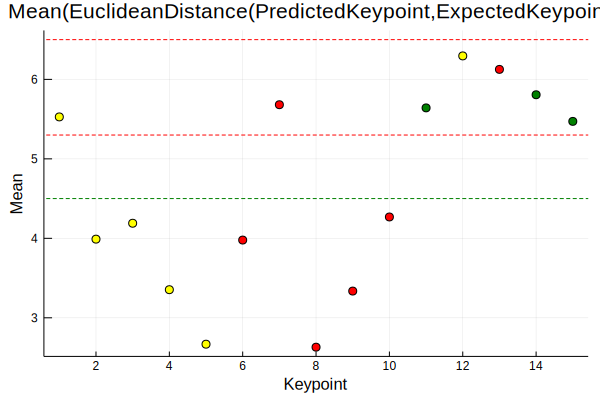

In [57]:
using Plots
scatter([1],[mean(ley_oe_ed)],label = "left_eyebrow_outer_end", 
                                       color=:yellow,legend=false,xlim=[0:1:16],ylim=[0:1:10],xlabel="Keypoint",ylabel="Mean")
scatter!([2],[mean(ley_ie_ed)],label = "left_eyebrow_inner_end",color=:yellow)
scatter!([3],[mean(le_oc_ed)],label = "left_eye_outer_corner",color=:yellow)
scatter!([4],[mean(le_c_ed)],label = "left_eye_center",color=:yellow)
scatter!([5],[mean(le_ic_ed)],label = "left_eye_inner_corner",color=:yellow)
scatter!([6],[mean(rey_ie_ed)],label = "right_eyebrow_inner_end",color=:red)
scatter!([7],[mean(rey_oe_ed)],label = "right_eyebrow_outer_end",color=:red)
scatter!([8],[mean(re_ic_ed)],label = "right_eye_inner_corner",color=:red)
scatter!([9],[mean(re_c_ed)],label = "right_eye_center",color=:red)
scatter!([10],[mean(re_oc_ed)],label = "right_eye_outer_corner",color=:red)
scatter!([11],[mean(nt_ed)],label = "nose_tip",color=:green)
scatter!([12],[mean(ml_c_ed)],label = "mouth_left_corner",color=:yellow)
scatter!([13],[mean(mr_c_ed)],label = "mouth_right_corner",color=:red)
scatter!([14],[mean(mc_tl_ed)],label = "mouth_center_top_lip",color=:green)
scatter!([15],[mean(mc_bl_ed)],label = "mouth_center_bottom_lip",color=:green)
hline!([4.5],ls=:dash,lw=1,color=:green)
hline!([5.3,6.5],ls=:dash,lw=1,color=:red)
title!("Mean(EuclideanDistance(PredictedKeypoint,ExpectedKeypoint))")

<font color=yellow>**Yellow**</font> represents <font color=yellow>**Left Side**</font> Keypoints, <font color=red>**Red**</font> represents <font color=red>**Right Side**</font> Keypoints, <font color=green>**Green**</font> represents <font color=green>**Center**</font> Keypoints <br>

**Mean of Euclidean Distance b/n Predicted and Expected Keypoint < ~4.5** <br>
[2] left_eyebrow_inner_end, [3] left_eye_outer_corner, [4] left_eye_center, [5] left_eye_inner_corner, <br>
[6] right_eyebrow_inner_end, [8] right_eye_inner_corner, [9] right_eye_center, [10] right_eye_outer_corner <br>

**~5.3 < Mean of Euclidean Distance b/n Predicted and Expected Keypoint < ~6.5** <br> [1] left_eyebrow_outer_end, [7] right_eyebrow_outer_end, [11] nose_tip, [12] mouth_left_corner, <br>
[13] mouth_right_corner, [14] mouth_center_top_lip, [15] mouth_center_bottom_lip <br>


In [58]:
########################################################  END  ################################################################

### 10.12. Get the test input data matching to MLP input layer expectation (<font color=blue>x_test</font>)

In [59]:
########################################################  START  ##############################################################

In [60]:
# load test data from .csv file to a dataframe
df_test=DataFrame(CSV.read(testfile));

In [61]:
# 1783 rows. 2 columns: ImageId, Image
size(df_test) 

(1783, 2)

In [62]:
# get x_test 
xdata_test = [[readdlm(IOBuffer(row.Image),Int64)] for row in eachrow(df_test)] / 255;
global x_test = [(xdata_test[1,1][1])']
for i in 2:size(df_test,1)
    x_test = vcat(x_test, [(xdata_test[i,1][1])'])
end
x_test

1783-element Array{LinearAlgebra.Adjoint{Float64,Array{Float64,2}},1}:
 [0.713725; 0.717647; … ; 0.0196078; 0.0196078]  
 [0.298039; 0.341176; … ; 0.827451; 0.658824]    
 [0.694118; 0.690196; … ; 0.00392157; 0.00392157]
 [0.690196; 0.682353; … ; 0.556863; 0.54902]     
 [0.196078; 0.184314; … ; 0.686275; 0.647059]    
 [0.694118; 0.694118; … ; 0.662745; 0.666667]    
 [0.301961; 0.215686; … ; 0.0235294; 0.0117647]  
 [0.611765; 0.627451; … ; 0.188235; 0.168627]    
 [0.901961; 0.901961; … ; 0.196078; 0.372549]    
 [0.517647; 0.505882; … ; 0.278431; 0.341176]    
 [0.713725; 0.713725; … ; 0.317647; 0.552941]    
 [0.811765; 0.803922; … ; 0.537255; 0.52549]     
 [0.47451; 0.32549; … ; 0.635294; 0.858824]      
 ⋮                                               
 [0.509804; 0.470588; … ; 0.658824; 0.643137]    
 [0.505882; 0.478431; … ; 0.462745; 0.458824]    
 [0.835294; 0.835294; … ; 0.541176; 0.533333]    
 [0.482353; 0.513725; … ; 0.313725; 0.34902]     
 [0.556863; 0.513725; … ; 0.4

In [63]:
# number of test instances = 1783
size(x_test)

(1783,)

In [64]:
# each element is a 9216x1 column vector - matching input layer expectations for the MLP 
size(x_test[1])

(9216, 1)

In [65]:
########################################################  END  ################################################################

### 10.13. Get Model Output  (<font color=blue>y_test</font>) for test data input  (<font color=blue>x_test</font>)

In [66]:
########################################################  START  ##############################################################

In [67]:
# Get test data keypoints by passing test data images to model for all test instances ... 1:1783
y_test = []
        for i in 1:(size(x_test,1))
            push!(y_test,Tracker.data(model(x_test[i])))
        end 
y_test

1783-element Array{Any,1}:
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 ⋮                                              
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80.8628]
 Float32[65.6942; 36.6306; … ; 48.8327; 80

In [68]:
########################################################  END  ################################################################

### 10.14. Plot one test image with the predicted keypoints 

In [69]:
########################################################  START  ##############################################################

In [70]:
# consider one instance out of 1783 instances of test data
TestDataIndex = 1
img = x_test[TestDataIndex]

9216×1 LinearAlgebra.Adjoint{Float64,Array{Float64,2}}:
 0.7137254901960784  
 0.7176470588235294  
 0.7137254901960784  
 0.7137254901960784  
 0.7058823529411765  
 0.7058823529411765  
 0.6901960784313725  
 0.6627450980392157  
 0.611764705882353   
 0.5372549019607843  
 0.48627450980392156 
 0.403921568627451   
 0.30980392156862746 
 ⋮                   
 0.09411764705882353 
 0.06274509803921569 
 0.023529411764705882
 0.054901960784313725
 0.10980392156862745 
 0.10980392156862745 
 0.09411764705882353 
 0.07058823529411765 
 0.047058823529411764
 0.03137254901960784 
 0.0196078431372549  
 0.0196078431372549  

#### 10.14.1 Get the image in the right view for plotting

In [71]:
# reshape 1x9216 matrix to a 96x96 matrix
img = reshape(img,(96,96));

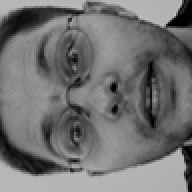

In [72]:
# view the image
using Images
colorview(Gray, img)
# image needs 90 degrees clockwise rotation

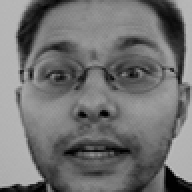

In [73]:
# perform 90 degrees clockwise rotation
# original image
# c   c c c
# b   b b b
# a0  a a a
# reverse(img,dims=1) does a x-axis mirror image
# a0  a a a
# b   b b b
# c   c c c
# ' does the transpose - replaces rows as columns
# a0 b c
# a  b c
# a  b c
# a  b c
imgrot=reverse(img,dims=1)';
colorview(Gray, imgrot)

#### 10.14.2 Calculate the keypoint information that needs to plotted

In [74]:
# read the keypoints info of the images into variables
# adjust the x coordinates to plot correctly when we use scatter
# width and height of the image: 96 x 96
width = 96; height = 96;

# array index for various coordinates
# left eye center                  #01: left_eye_center_x             #02: left_eye_center_y
# right eye center                 #03: right_eye_center_x            #04: right_eye_center_y
# left eye inner corner            #05: left_eye_inner_corner_x       #06: left_eye_inner_corner_y
# left eye outer corner            #07: left_eye_outer_corner_x       #08: left_eye_outer_corner_y
# right eye inner corner           #09: right_eye_inner_corner_x      #10: right_eye_inner_corner_y
# right eye outer corner           #11: right_eye_outer_corner_x      #12: right_eye_outer_corner_y
# left eyebrow inner end           #13: left_eyebrow_inner_end_x      #14: left_eyebrow_inner_end_y
# left eyebrow outer end           #15: left_eyebrow_outer_end_x      #16: left_eyebrow_outer_end_y
# right eyebrow inner end          #17: right_eyebrow_inner_end_x     #18: right_eyebrow_inner_end_y
# right eyebrow outer end          #19: right_eyebrow_outer_end_x     #20: right_eyebrow_outer_end_y
# nose tip                         #21: nose_tip_x                    #22: nose_tip_y
# mouth left corner                #23: mouth_left_corner_x           #24: mouth_left_corner_y
# mouth right corner               #25: mouth_right_corner_x          #26: mouth_right_corner_y
# mouth center top lip             #27: mouth_center_top_lip_x        #28: mouth_center_top_lip_y
# mouth center bottom lip          #29: mouth_center_bottom_lip_x     #30: mouth_center_bottom_lip_y

# left eyebrow
# left_eyebrow_outer_end
ley_oe_x = width - y_test[TestDataIndex][15]; ley_oe_y = height - y_test[TestDataIndex][16];
# left_eyebrow_inner_end
ley_ie_x = width - y_test[TestDataIndex][13]; ley_ie_y = height - y_test[TestDataIndex][14]; 

# left eye
# left_eye_outer_corner
le_oc_x = width - y_test[TestDataIndex][7]; le_oc_y = height - y_test[TestDataIndex][8];
# left_eye_center
le_c_x = width - y_test[TestDataIndex][1]; le_c_y = height - y_test[TestDataIndex][2]; 
# left_eye_inner_corner
le_ic_x = width - y_test[TestDataIndex][5]; le_ic_y = height - y_test[TestDataIndex][6];

# right eyebrow
# right_eyebrow_inner_end
rey_ie_x = width - y_test[TestDataIndex][17]; rey_ie_y = height - y_test[TestDataIndex][18];
# right_eyebrow_outer_end
rey_oe_x = width - y_test[TestDataIndex][19]; rey_oe_y = height - y_test[TestDataIndex][20];

# right eye
# right_eye_inner_corner
re_ic_x = width - y_test[TestDataIndex][9]; re_ic_y = height - y_test[TestDataIndex][10]; 
# right_eye_center
re_c_x = width - y_test[TestDataIndex][3]; re_c_y = height - y_test[TestDataIndex][4];
# right_eye_outer_corner
re_oc_x = width - y_test[TestDataIndex][11]; re_oc_y = height - y_test[TestDataIndex][12];

# nose_tip
nt_x = width - y_test[TestDataIndex][21]; nt_y = height - y_test[TestDataIndex][22]; 

# mouth
# mouth_left_corner
ml_c_x = width - y_test[TestDataIndex][23]; ml_c_y = height - y_test[TestDataIndex][24];
# mouth_right_corner
mr_c_x = width - y_test[TestDataIndex][25]; mr_c_y = height - y_test[TestDataIndex][26];
# mouth_center_top_lip
mc_tl_x = width - y_test[TestDataIndex][27]; mc_tl_y = height - y_test[TestDataIndex][28];
# mouth_center_bottom_lip
mc_bl_x = width - y_test[TestDataIndex][29]; mc_bl_y = height - y_test[TestDataIndex][30];

#### 10.14.3 Plot the input to the model (<font color=blue>Face Image</font>)

In [75]:
# to use heatmap / plot
using Plots
gr()
# define width and height of the image to be plotted
width = 96; height = 96;

In [76]:
# Why using "heatmap" instead of "plot" ?
#= 
# Tried using plots to view the array imgrot. It did not work.
# One way to make it work with plot - save the array as a file, load the file back, use it for plot - works.
imgrot = map(clamp01nan, imgrot); # to avoid the warning on out of range
save("selfdata/TestImage$TestDataIndex.png", colorview(Gray, imgrot))
gr()
imgrot = load("selfdata/TestImage$TestDataIndex.png")
# yflip=false ensures the y-axis flip does not happen => we get 0 at bottom, 96 at top
# A[end: -1: 1,:] extracts the rows starting from last row to 1st row  i.e. the (last row, all column data) 
# gets plotted to the bottom of the canvas and the next row on top of it... till we reach 1st row which gets plotted 
# on the top of the canvas ... thereby avoids the vertical flip of the image and we are able to see the image as 
# we see in real world. 
p1 = plot(imgrot[end:-1:1,:],legend=false,yflip=false,xlims=[0,width],ylims=[0,height])
=#

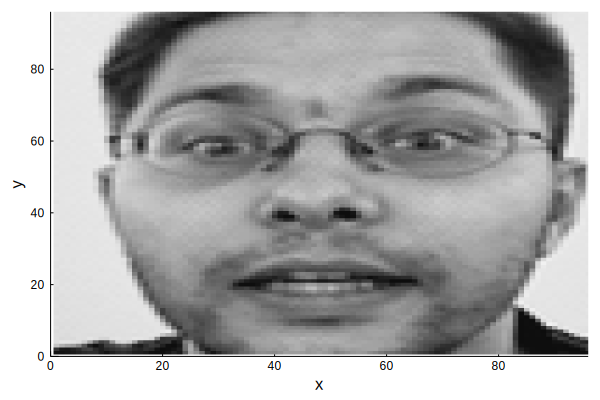

In [77]:
h = heatmap(imgrot[end:-1:1,:],legend=false, xlims=[0,width],ylims=[0,height],color =:grays,xlabel="x", ylabel ="y")

#### 10.14.4 Superimpose the output (<font color=blue>Keypoints</font>) from the model over the input (<font color=blue>Face Image</font>)

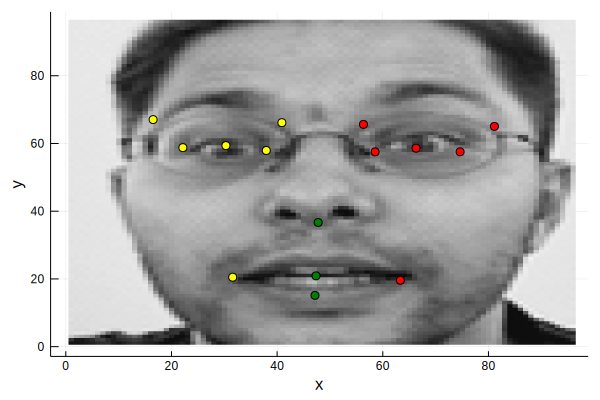

In [78]:
# superimpose the keypoints onto the image
# left = yellow, right = red, centre = green

# left eyebrow
scatter!(h, [ley_oe_x],[ley_oe_y],color=:yellow)
scatter!(h, [ley_ie_x],[ley_ie_y],color=:yellow)

# left eye
scatter!(h, [le_oc_x],[le_oc_y],color=:yellow)
scatter!(h, [le_c_x],[le_c_y],color=:yellow)
scatter!(h, [le_ic_x],[le_ic_y],color=:yellow)

# right eyebrow
scatter!(h, [rey_ie_x],[rey_ie_y],color=:red)
scatter!(h, [rey_oe_x],[rey_oe_y],color=:red)

# right eye
scatter!(h, [re_ic_x],[re_ic_y],color=:red)
scatter!(h, [re_c_x],[re_c_y],color=:red)
scatter!(h, [re_oc_x],[re_oc_y],color=:red)

# nose tip
scatter!(h, [nt_x],[nt_y],color=:green)

# mouth
scatter!(h, [ml_c_x],[ml_c_y],color=:yellow)
scatter!(h, [mr_c_x],[mr_c_y],color=:red)
scatter!(h, [mc_tl_x],[mc_tl_y],color=:green)
scatter!(h, [mc_bl_x],[mc_bl_y],color=:green)

Key Observation:<br>
**For Test Data1: 3 center keypoints (mentioned below) are more away from where they should be.** <br>
[11] nose_tip, [14] mouth_center_top_lip, [15] mouth_center_bottom_lip 

In [79]:
# uncomment below code in case, we wish to save the plot as a image file
# gives warning, but does save the file. did Pkg.update(), Pkg.build("ImageMagick"), however warning persists
#save("selfdata/TestImageWithPoints$TestDataIndex.png", h)

In [80]:
########################################################  END  ################################################################

### 10.15. Check Test Error 

In [81]:
########################################################  START  ##############################################################

In [82]:
# custom function to calculate mean of the given coordinate
function coord_mean(coord_array,size,index)
    total = 0.0
    for i in 1:size
        total = total + coord_array[i][index]
    end
    return (total/size)
end  

coord_mean (generic function with 1 method)

#### 10.15.1 Calculate the euclidean distance between "test(x,y)" and "mean of training(x,y)" for all test instances for all keypoints

In [83]:
# calculate the euclidean distance between "test(x,y)" and "mean of training(x,y)" for all test instances for all keypoints

# array index for various coordinates
# left eye center                  #01: left_eye_center_x             #02: left_eye_center_y
# right eye center                 #03: right_eye_center_x            #04: right_eye_center_y
# left eye inner corner            #05: left_eye_inner_corner_x       #06: left_eye_inner_corner_y
# left eye outer corner            #07: left_eye_outer_corner_x       #08: left_eye_outer_corner_y
# right eye inner corner           #09: right_eye_inner_corner_x      #10: right_eye_inner_corner_y
# right eye outer corner           #11: right_eye_outer_corner_x      #12: right_eye_outer_corner_y
# left eyebrow inner end           #13: left_eyebrow_inner_end_x      #14: left_eyebrow_inner_end_y
# left eyebrow outer end           #15: left_eyebrow_outer_end_x      #16: left_eyebrow_outer_end_y
# right eyebrow inner end          #17: right_eyebrow_inner_end_x     #18: right_eyebrow_inner_end_y
# right eyebrow outer end          #19: right_eyebrow_outer_end_x     #20: right_eyebrow_outer_end_y
# nose tip                         #21: nose_tip_x                    #22: nose_tip_y
# mouth left corner                #23: mouth_left_corner_x           #24: mouth_left_corner_y
# mouth right corner               #25: mouth_right_corner_x          #26: mouth_right_corner_y
# mouth center top lip             #27: mouth_center_top_lip_x        #28: mouth_center_top_lip_y
# mouth center bottom lip          #29: mouth_center_bottom_lip_x     #30: mouth_center_bottom_lip_y

# define the arrays
# left eyebrow
# left_eyebrow_outer_end
ley_oe_ed_y_test = []
# left_eyebrow_inner_end
ley_ie_ed_y_test = []

# left eye
# left_eye_outer_corner
le_oc_ed_y_test = []
# left_eye_center
le_c_ed_y_test = [] 
# left_eye_inner_corner
le_ic_ed_y_test = []

# right eyebrow
# right_eyebrow_inner_end
rey_ie_ed_y_test = [] 
# right_eyebrow_outer_end
rey_oe_ed_y_test = []

# right eye
# right_eye_inner_corner
re_ic_ed_y_test = []  
# right_eye_center
re_c_ed_y_test = [] 
# right_eye_outer_corner
re_oc_ed_y_test = [] 

# nose_tip
nt_ed_y_test = []

# mouth
# mouth_left_corner
ml_c_ed_y_test = [] 
# mouth_right_corner
mr_c_ed_y_test = []
# mouth_center_top_lip
mc_tl_ed_y_test = []
# mouth_center_bottom_lip
mc_bl_ed_y_test = []

# calculate the euclidean distance between "test(x,y)" and "mean of training(x,y)" for all test instances for all keypoints
for i in 1:(size(y_test,1))
    push!(ley_oe_ed_y_test,euclideandistance(y_test[i][15],y_test[i][16],
                                coord_mean(y_trn_traindata,traindata_size,15),coord_mean(y_trn_traindata,traindata_size,16)))
    push!(ley_ie_ed_y_test,euclideandistance(y_test[i][13],y_test[i][14],
                                coord_mean(y_trn_traindata,traindata_size,13),coord_mean(y_trn_traindata,traindata_size,14)))
    
    push!(le_oc_ed_y_test,euclideandistance(y_test[i][7],y_test[i][8],
                                coord_mean(y_trn_traindata,traindata_size,7),coord_mean(y_trn_traindata,traindata_size,8)))   
    push!(le_c_ed_y_test,euclideandistance(y_test[i][1],y_test[i][2],
                                coord_mean(y_trn_traindata,traindata_size,1),coord_mean(y_trn_traindata,traindata_size,2)))  
    push!(le_ic_ed_y_test,euclideandistance(y_test[i][5],y_test[i][6],
                                coord_mean(y_trn_traindata,traindata_size,5),coord_mean(y_trn_traindata,traindata_size,6)))
    
    push!(rey_ie_ed_y_test,euclideandistance(y_test[i][17],y_test[i][18],
                                coord_mean(y_trn_traindata,traindata_size,17),coord_mean(y_trn_traindata,traindata_size,18)))
    push!(rey_oe_ed_y_test,euclideandistance(y_test[i][19],y_test[i][20],
                                coord_mean(y_trn_traindata,traindata_size,19),coord_mean(y_trn_traindata,traindata_size,20)))
    
    push!(re_ic_ed_y_test,euclideandistance(y_test[i][9],y_test[i][10],
                                coord_mean(y_trn_traindata,traindata_size,9),coord_mean(y_trn_traindata,traindata_size,10)))
    push!(re_c_ed_y_test,euclideandistance(y_test[i][3],y_test[i][4],
                                coord_mean(y_trn_traindata,traindata_size,3),coord_mean(y_trn_traindata,traindata_size,4)))
    push!(re_oc_ed_y_test,euclideandistance(y_test[i][11],y_test[i][12],
                                coord_mean(y_trn_traindata,traindata_size,11),coord_mean(y_trn_traindata,traindata_size,12)))
    
    push!(nt_ed_y_test,euclideandistance(y_test[i][21],y_test[i][22],
                                coord_mean(y_trn_traindata,traindata_size,21),coord_mean(y_trn_traindata,traindata_size,22)))
    
    push!(ml_c_ed_y_test,euclideandistance(y_test[i][23],y_test[i][24],
                                coord_mean(y_trn_traindata,traindata_size,23),coord_mean(y_trn_traindata,traindata_size,24)))
    push!(mr_c_ed_y_test,euclideandistance(y_test[i][25],y_test[i][26],
                                coord_mean(y_trn_traindata,traindata_size,25),coord_mean(y_trn_traindata,traindata_size,26)))
    push!(mc_tl_ed_y_test,euclideandistance(y_test[i][27],y_test[i][28],
                                coord_mean(y_trn_traindata,traindata_size,27),coord_mean(y_trn_traindata,traindata_size,28)))
    push!(mc_bl_ed_y_test,euclideandistance(y_test[i][29],y_test[i][30],
                                coord_mean(y_trn_traindata,traindata_size,29),coord_mean(y_trn_traindata,traindata_size,30)))
end

#### 10.15.2 Plot "mean of euclidean distance" between "test(x,y)" and "mean of training(x,y)" for all test instances for all keypoints

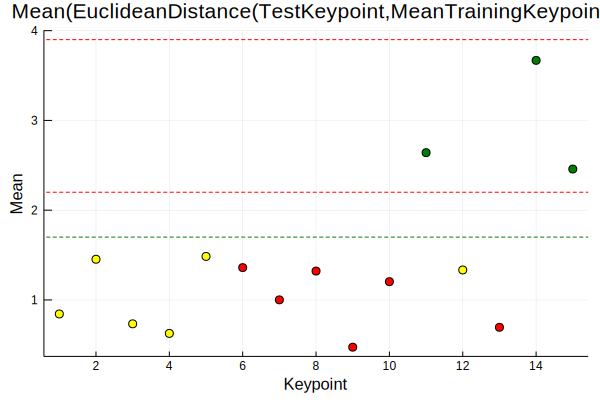

In [84]:
# plot "mean of euclidean distance" between "test(x,y)" and "mean of training(x,y)" for all test instances for all keypoints
using Plots
scatter([1],[mean(ley_oe_ed_y_test)],label = "left_eyebrow_outer_end", 
                                       color=:yellow,legend=false,xlim=[0:1:16],ylim=[0:1:10],xlabel="Keypoint",ylabel="Mean")
scatter!([2],[mean(ley_ie_ed_y_test)],label = "left_eyebrow_inner_end",color=:yellow)
scatter!([3],[mean(le_oc_ed_y_test)],label = "left_eye_outer_corner",color=:yellow)
scatter!([4],[mean(le_c_ed_y_test)],label = "left_eye_center",color=:yellow)
scatter!([5],[mean(le_ic_ed_y_test)],label = "left_eye_inner_corner",color=:yellow)
scatter!([6],[mean(rey_ie_ed_y_test)],label = "right_eyebrow_inner_end",color=:red)
scatter!([7],[mean(rey_oe_ed_y_test)],label = "right_eyebrow_outer_end",color=:red)
scatter!([8],[mean(re_ic_ed_y_test)],label = "right_eye_inner_corner",color=:red)
scatter!([9],[mean(re_c_ed_y_test)],label = "right_eye_center",color=:red)
scatter!([10],[mean(re_oc_ed_y_test)],label = "right_eye_outer_corner",color=:red)
scatter!([11],[mean(nt_ed_y_test)],label = "nose_tip",color=:green)
scatter!([12],[mean(ml_c_ed_y_test)],label = "mouth_left_corner",color=:yellow)
scatter!([13],[mean(mr_c_ed_y_test)],label = "mouth_right_corner",color=:red)
scatter!([14],[mean(mc_tl_ed_y_test)],label = "mouth_center_top_lip",color=:green)
scatter!([15],[mean(mc_bl_ed_y_test)],label = "mouth_center_bottom_lip",color=:green)
hline!([1.7],ls=:dash,lw=1,color=:green)
hline!([2.2,3.9],ls=:dash,lw=1,color=:red)
title!("Mean(EuclideanDistance(TestKeypoint,MeanTrainingKeypoint))")

<font color=yellow>**Yellow**</font> represents <font color=yellow>**Left Side**</font> Keypoints, <font color=red>**Red**</font> represents <font color=red>**Right Side**</font> Keypoints, <font color=green>**Green**</font> represents <font color=green>**Center**</font> Keypoints <br>

**Mean of Euclidean Distance b/n "Test Keypoint" and "Mean of Training Keypoint" < ~1.7** <br>
[1] left_eyebrow_outer_end, [2] left_eyebrow_inner_end, [3] left_eye_outer_corner, [4] left_eye_center, <br>
[5] left_eye_inner_corner, [6] right_eyebrow_inner_end, [7] right_eyebrow_outer_end, [8] right_eye_inner_corner, <br>
[9] right_eye_center, [10] right_eye_outer_corner, [12] mouth_left_corner, [13] mouth_right_corner, <br>

**~2.2 < Mean of Euclidean Distance b/n "Test Keypoint" and "Mean of Training Keypoint" < ~3.9** <br> 
[11] nose_tip, [14] mouth_center_top_lip, [15] mouth_center_bottom_lip <br>

Key Observations <br>
- For Training Data: we have 8keypoints more away from expected value. For Test Data: we have 3 keypoints more away from mean.=> Model training error is higher (consistency), however, test error is lesser (generalization).<br>
- For All Test Data: 3 center keypoints are more away from mean. For Test Data1 (visual inspection of plot): 3 center keypoints are more away from where they should be. <br><br>
**Conclusion: Model is generalizing well, however, more test error is seen for the center keypoints which needs to be improved.**

In [85]:
########################################################  END  ################################################################